In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error
import seaborn as sn

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

%matplotlib inline

In [77]:
# #Load data from URL
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
# data = pd.read_csv(url,
#                    names= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
#                            'race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'income_class'])

# # Save data to CSV file
# data.to_csv('adult_data.csv', index=False)


In [78]:
# Read data from CSV file
data = pd.read_csv('adult_data.csv')

In [79]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning

In [80]:
# Check for missing values
data.isnull().sum()   #no missing values itseems

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_class      0
dtype: int64

In [81]:
data['income_class'].value_counts()

 <=50K    24720
 >50K      7841
Name: income_class, dtype: int64

In [82]:
# Create target column using boolean indexing for target
data['target'] = (data['income_class'] == ' >50K').astype(int)

In [83]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [84]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [85]:
# Replace '?' values with mode value in workclass column
# mode_value = data['workclass'].mode()[0]
# data['workclass'] = data['workclass'].replace(' ?', mode_value)

In [86]:
# Drop rows with '?' values in workclass column
data = data[data['workclass'] != ' ?']
data = data[data['occupation'] != ' ?']

In [87]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [88]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [89]:
print(data['workclass'].value_counts())
print(data['education'].value_counts())
print(data['marital-status'].value_counts())
print(data['occupation'].value_counts())
print(data['relationship'].value_counts())
print(data['race'].value_counts())
#'workclass_Private', "education_HS-grad", "marital-status_Married-civ-spouse", "occupation_Prof-specialty", "relationship_Husband", "race_White"

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9968
 Some-college    6775
 Bachelors       5182
 Masters         1675
 Assoc-voc       1321
 11th            1056
 Assoc-acdm      1020
 10th             831
 7th-8th          573
 Prof-school      558
 9th              463
 Doctorate        398
 12th             393
 5th-6th          303
 1st-4th          156
 Preschool         46
Name: education, dtype: int64
 Married-civ-spouse       14339
 Never-married             9912
 Divorced                  4258
 Separated                  959
 Widowed                    840
 Married-spouse-absent      389
 Married-AF-spouse           21
Name: marital-status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Othe

In [90]:
#create dataframe of dummy variables
diff = data[['workclass','education','marital-status','occupation','relationship','race']]
data_onehot_df = pd.get_dummies(diff, prefix=['workclass','education','marital-status','occupation','relationship','race'])

In [91]:
data_onehot_df.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [92]:
data.drop(['fnlwgt', "education-num"],axis=1, inplace=True)

In [93]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [94]:
data['native-country'].value_counts
data['native-country'] = data['native-country'].astype(str)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [95]:
# If American = 1, idividual is from USA. Else, it is 0.
data["American"] = np.where(data["native-country"] == " United-States", 1,0)
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income_class,target,American
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0,1


In [96]:
# combine dummy variables with original data frame
data_concat = pd.concat([data, data_onehot_df], axis=1)
data_concat

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,1,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,...,0,0,0,0,1,0,0,0,0,1
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,...,0,0,0,1,0,0,0,0,0,1
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,...,0,0,1,0,0,0,0,0,0,1


In [97]:
# Drop variables that were one hot encoded
data_concat.drop(['workclass', "education", "marital-status", "relationship", "occupation", "race", "sex", "native-country", "income_class"],axis=1, inplace=True)
data_concat = data_concat.reset_index(drop = True)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
# standardizing the quantatative variables. Sets their mean equal to 0, stddev = 1

data_concat2 = data_concat.iloc[:, :4]
data_concat_scaled = pd.DataFrame(scaler.fit_transform(data_concat2))
data_concat_scaled.rename(columns={0: "age", 1: "capital-gain", 2 : "capital-loss", 3 : "hours-per-week"}, inplace = True)
data_concat_scaled.reset_index(drop = True)
data_concat_scaled

data_concat["age"] = data_concat_scaled["age"]
data_concat["capital-gain"] = data_concat_scaled["capital-gain"]
data_concat["capital-loss"] = data_concat_scaled["capital-loss"]
data_concat["hours-per-week"] = data_concat_scaled["hours-per-week"]
data_concat

,age,capital-gain,capital-loss,hours-per-week,target,American,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,0.042416,0.142438,-0.219179,-0.079207,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.880958,-0.147516,-0.219179,-2.331988,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.033815,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1.109651,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.796125,-0.147516,-0.219179,-0.079207,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,-0.872356,-0.147516,-0.219179,-0.246080,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
30714,0.118647,-0.147516,-0.219179,-0.079207,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30715,1.490806,-0.147516,-0.219179,-0.079207,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
30716,-1.253512,-0.147516,-0.219179,-1.747934,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [100]:
for col in data_concat.columns:
    print(col)

age
capital-gain
capital-loss
hours-per-week
target
American
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_ 10th
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
marital-status_ Divorced
marital-status_ Married-AF-spouse
marital-status_ Married-civ-spouse
marital-status_ Married-spouse-absent
marital-status_ Never-married
marital-status_ Separated
marital-status_ Widowed
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ Other-service
occupation_ Priv-house-serv
occupation_ 

In [101]:
import time
start_time = time.time()

y_pre = data_concat.drop(['target', 'workclass_ Private', "education_ HS-grad", "marital-status_ Married-civ-spouse", "occupation_ Prof-specialty", "relationship_ Husband", "race_ White"],axis=1)
X = np.array(y_pre)
Y = np.array(data_concat.target)

scores = []
for i in range(100):
    X_train100, X_test100, Y_train100, Y_test100 = train_test_split(X, Y, test_size=0.2, random_state=i)

    clf = LogisticRegression(random_state=i, max_iter=1000)
    clf.fit(X_train100,Y_train100)

    scores.append(clf.score(X_test100, Y_test100))
    
print(np.mean(scores))

print("--- %s seconds ---" % (time.time() - start_time))

0.8467317708333333
--- 29.626062154769897 seconds ---


<AxesSubplot:>

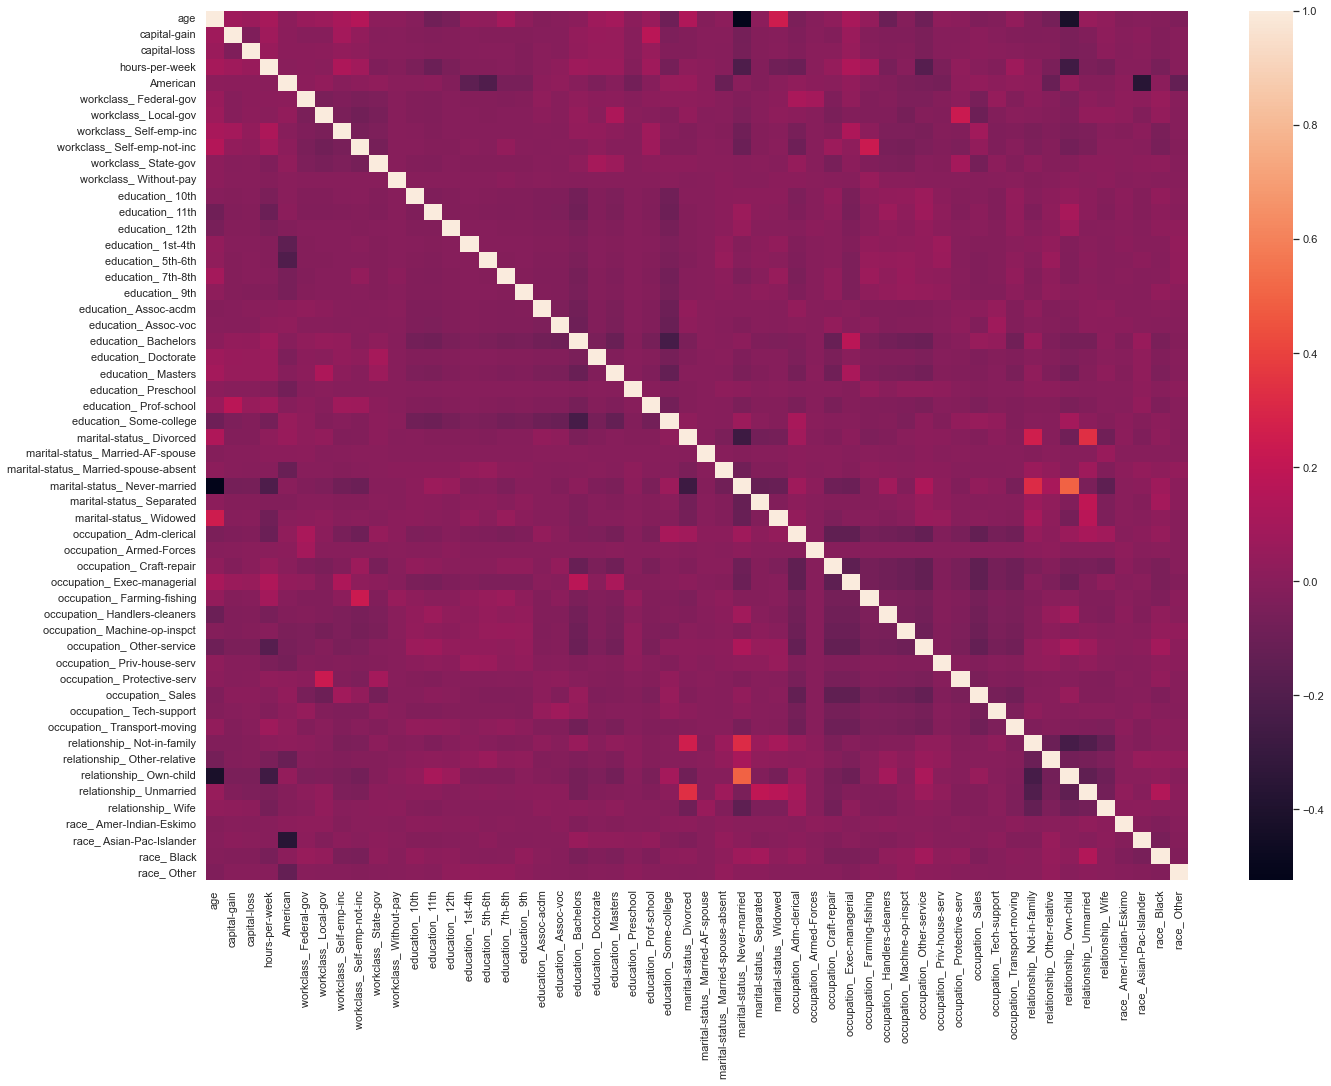

In [102]:
#display(df.to_string())
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 6,
#                        ):
#     print(y_pre.corr())
sn.set(rc={'figure.figsize':(22,16)})
corr_matrix = y_pre.corr()
sn.heatmap(corr_matrix)

Simulating 100 different 80-20 train-test splits and averaging the testing results produces an accuracy of 84.67%. This shows that our below singular model is not a fluke

In [103]:
# splitting the data, training a logistic rggression model, testing it on 20% of the data
# achieves 84.6% accuracy
# can and will be fine tuned

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=48825)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=48825)

# clf_with_imbalance = LogisticRegression(random_state=0, max_iter=1000, class_weight={0:0.25,1:0.75})
# clf_without_imbalance = LogisticRegression(random_state=0, max_iter=1000)
# clf_with_imbalance.fit(X_train,y_train)
# clf_without_imbalance.fit(X_train,y_train)

# print("Accuracy without imbalance: ",clf_without_imbalance.score(X_val, y_val))
# y_pred = clf_without_imbalance.predict(X_val)
# print("F1 Score without imbalance: ",f1_score(y_pred, y_val))

# print("Accuracy with imbalance: ",clf_with_imbalance.score(X_val, y_val))
# y_pred = clf_with_imbalance.predict(X_val)
# print("F1 Score with imbalance: ",f1_score(y_pred, y_val))

In [104]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = metrics.accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8427734375


In [105]:
y_pred_eval = clf.predict(X_val)
accuracy_eval = metrics.accuracy_score(y_val, y_pred_eval)
print(f"Evaluation accuracy: {accuracy_eval}")

Evaluation accuracy: 0.8489583333333334


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
features = list(data_concat.columns)
features.remove("target")
# Define the feature and target data
X = data_concat[features]
y = data_concat["target"]
# Check for biased features
importances = improved_random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(54):
    print(f"{f+1}. {features[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. capital-gain (0.19907575898599494)
2. age (0.10948323053366012)
3. marital-status_ Married-AF-spouse (0.09216437504088221)
4. hours-per-week (0.07172342700355114)
5. capital-loss (0.06192350797930797)
6. occupation_ Protective-serv (0.053106114248884305)
7. education_ Assoc-voc (0.045505668437162194)
8. education_ Prof-school (0.03639407950816932)
9. education_ Doctorate (0.0356958771913096)
10. occupation_ Transport-moving (0.035083059595044486)
11. occupation_ Adm-clerical (0.035050382074675895)
12. occupation_ Tech-support (0.02961481960856405)
13. education_ Masters (0.023462930091832708)
14. occupation_ Farming-fishing (0.01828817679145176)
15. education_ Bachelors (0.01676091263655147)
16. workclass_ Self-emp-inc (0.011562681838497851)
17. relationship_ Husband (0.008968942012474489)
18. education_ Preschool (0.007409034925472893)
19. occupation_ Armed-Forces (0.007347666408911945)
20. marital-status_ Married-civ-spouse (0.006883651554704101)
21. workclass_ Pr

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [55]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  13.3s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1000; total time=  15.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.1min


/Users/terra/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=  12.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  11.5s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200; total time=   9.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=800; total time=  11.7s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=600; total time=  10.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time= 1.1min
[CV] END bootstrap=True, max_depth=10,

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

In [59]:
improved_random_forest = RandomForestClassifier(n_estimators=800, min_samples_split=10,
                                                min_samples_leaf=2, max_features='sqrt', max_depth=30, bootstrap=False)
improved_random_forest.fit(X_train, y_train)

y_pred_improved = improved_random_forest.predict(X_test)
improved_accuracy = metrics.accuracy_score(y_pred_improved, y_test)
print(f"Accuracy: {improved_accuracy}")

Accuracy: 0.861328125


In [60]:
change_in_accuracy = abs(accuracy - improved_accuracy)
print('Improvement of {:0.2f}%'.format(100 * change_in_accuracy))


Improvement of 1.89%


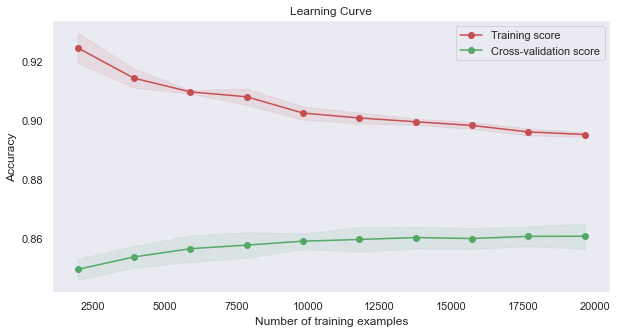

In [62]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(improved_random_forest, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 5))
plt.title('Learning Curve')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')

plt.legend(loc='best')
plt.show()


The learning curve shows how the accuracy of the model improves as the number of training examples increases. The x-axis represents the number of training examples, and the y-axis represents the accuracy of the model. The blue line represents the cross-validation score (i.e., the accuracy on the validation set), and the red line represents the training score (i.e., the accuracy on the training set). The shaded regions around the lines represent the standard deviation of the scores.

If the training score is much higher than the cross-validation score, it indicates that the model is overfitting to the training data and may not generalize well to new data. If the training score and cross-validation score are both low, it indicates that the model is underfitting the data and may benefit from more training examples or a more complex model.

 it seems that the training score and cross-validation score are both high and relatively close to each other. The training score starts at 0.925 and ends at 0.903, which indicates that the model is not overfitting too much to the training data. The cross-validation score starts at 0.85 and ends at 0.86, which indicates that the model is able to generalize well to new data.

Overall, these results suggest that the model is performing well and has achieved a good balance between bias and variance. 

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
features = list(data_concat.columns)
features.remove("target")
# Define the feature and target data
X = data_concat[features]
y = data_concat["target"]
# Check for biased features
importances = improved_random_forest.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(54):
    print(f"{f+1}. {features[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. capital-gain (0.19907575898599494)
2. age (0.10948323053366012)
3. marital-status_ Married-AF-spouse (0.09216437504088221)
4. hours-per-week (0.07172342700355114)
5. capital-loss (0.06192350797930797)
6. occupation_ Protective-serv (0.053106114248884305)
7. education_ Assoc-voc (0.045505668437162194)
8. education_ Prof-school (0.03639407950816932)
9. education_ Doctorate (0.0356958771913096)
10. occupation_ Transport-moving (0.035083059595044486)
11. occupation_ Adm-clerical (0.035050382074675895)
12. occupation_ Tech-support (0.02961481960856405)
13. education_ Masters (0.023462930091832708)
14. occupation_ Farming-fishing (0.01828817679145176)
15. education_ Bachelors (0.01676091263655147)
16. workclass_ Self-emp-inc (0.011562681838497851)
17. relationship_ Husband (0.008968942012474489)
18. education_ Preschool (0.007409034925472893)
19. occupation_ Armed-Forces (0.007347666408911945)
20. marital-status_ Married-civ-spouse (0.006883651554704101)
21. workclass_ Pr

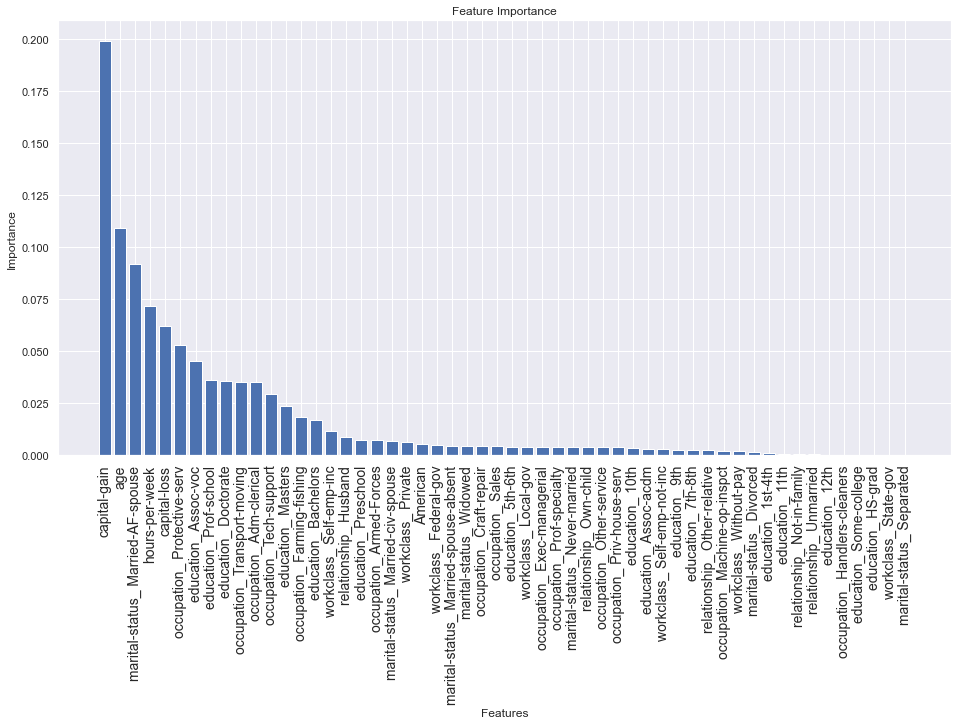

In [70]:

feature_names = np.array(features)
plt.figure(figsize=(16, 8))
plt.bar(feature_names[indices], importances[indices])
plt.xticks(rotation=90,fontsize=14)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.show()

#### In the first model, the top 5 important features are:

capital-gain</br>
age</br>
marital-status_ Married-civ-spouse</br>
hours-per-week</br>
capital_loss</br>


#### In the improved model, the top 5 important features are:

capital-gain</br>
age</br>
marital-status_ Married-civ-spouse</br>
hours-per-week</br>
capital_loss</br>




There is no change in the feature importance of the first model and the second model. 



In [73]:
# Calculate F1 score and print classification report
f1 = classification_report(y_test, y_pred_improved)
print(f"F1 score: \n", f1)

F1 score: 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      2295
           1       0.80      0.60      0.69       777

    accuracy                           0.86      3072
   macro avg       0.84      0.77      0.80      3072
weighted avg       0.86      0.86      0.85      3072




the model seems to perform reasonably well on the adult census income dataset. The F1-score is a weighted average of the precision and recall, with a value between 0 and 1, where 1 is the best possible score.

The F1-score of 0.91 for class 0 (income <=50K) indicates that the model has a high precision and recall for predicting this class. The precision of 0.87 suggests that out of all the predicted samples as belonging to class 0, 87% of them are actually true positives. The recall of 0.95 indicates that out of all the actual samples belonging to class 0, the model correctly predicted 95% of them.

However, the F1-score for class 1 (income >50K) is 0.69, which is much lower than for class 0. This indicates that the model has lower precision and recall for predicting class 1. The precision of 0.80 suggests that out of all the predicted samples as belonging to class 1, 80% of them are actually true positives. The recall of 0.60 indicates that out of all the actual samples belonging to class 1, the model correctly predicted only 60% of them.

Overall, the macro-average F1-score of 0.80 and the weighted-average F1-score of 0.85 suggest that the model performs reasonably well across both classes